# Airbnb 데이터로 숙소 가격에 영향을 미치는 컬럼 간의 상관관계 도출하기

- 프로젝트 목적 : 다양한 관점에서 분석하며 컬럼간의 상관관계 도출하기
- 활용 데이터 : 미국 NYC Airbnb 목록(2019)
- [데이터 출처](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)
---
### 목차  
1. 라이브러리 및 데이터 불러오기
2. EDA
3. 분석 주제  
    A.  
    B.  
    C.
     
---

# 1. 라이브러리 및 데이터 불러오기

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 한글 폰트 사용을 위한 라이브러리

!pip install koreanize-matplotlib

import koreanize_matplotlib

In [5]:
# 데이터 불러오기

df_raw = pd.read_csv('train.csv')
df_raw.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


In [7]:
# 데이터 복사하기 : 원본 보존을 위해(df_raw)
df = df_raw.copy()
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


# 2. EDA
## 데이터 사이즈 확인

In [9]:
# 데이터 사이즈 확인
df.shape

(39116, 16)

## 데이터 컬럼 정보 확인

In [13]:
# 기본 정보 확인하기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

### 컬럼 별 의미

- id: 에어비앤비 숙소 ID
- name: 에어비앤비 숙소(건물) 이름
- host_id: 호스트 ID
- host_name: 호스트 이름
- neighbourhood_group: 뉴욕시의 주요 지역
- neighbourhood: 뉴욕시의 이웃 지역
- latitude: 위도
- longitude: 경도
- room_type: 객실 유형 (Entire home/apartment, Private room, Shared room)
- price: 1박 요금
- minimum_nights: 최소 숙박일
- number_of_reviews: 리뷰 수
- last_review: 마지막(최신) 리뷰 날짜
- reviews_per_month: 월 평균 리뷰 수
- calculated_host_listings_count: 호스트가 등록한 숙소 개수
- availability_365: 연간 가용 일수

## 결측치 확인

In [15]:
# 컬럼 별 결측치 개수 확인
df.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

- 리뷰 컬럼들에서 결측치가 보입니다. (최신 리뷰 날짜, 월 평균 리뷰 수)
- 7994개의 결측치는 전체 데이터 중 20%를 차지하므로, 어떻게 처리할지 살펴보겠습니다.

In [17]:
# reviews_per_month 가 null인 경우 살펴보기

df[df['reviews_per_month'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0
23,36421786,Luxury | Private room |Balcony|Parking included,211500809,Stefania,Queens,Jackson Heights,40.74765,-73.89445,Private room,110,2,0,NaN,NaN,1,85
27,19544766,Large+Amazing 2BR ( Flex)-Upper East Side-E89th,2856748,Ruchi,Manhattan,Upper East Side,40.77608,-73.94364,Entire home/apt,220,30,0,NaN,NaN,49,325
34,9844892,Family-friendly Village Apartment,50690190,Ryan,Manhattan,Greenwich Village,40.72969,-74.00117,Entire home/apt,210,1,0,NaN,NaN,1,0
37,236806,charming 2bdrm apt in East Village,1151987,Juvie,Manhattan,East Village,40.72264,-73.98370,Entire home/apt,160,4,0,NaN,NaN,1,0


- 월 평균 리뷰수가 null인 경우 최신 리뷰 날짜도 null입니다. 
- 이는 최근에 작성된 리뷰가 없기 때문에 월 평균 리뷰 개수도 없는 것으로 보입니다.
- 따라서 모든 결측치를 0으로 대체합니다.

## 결측치 0으로 대체하기

In [19]:
# 결측치 0으로 대체하기

df[['reviews_per_month', 'last_review']] = df[['reviews_per_month', 'last_review']].fillna(0)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,0,0.00,1,0


- null값의 예시로 0으로 대체하기 전후의 인덱스 4번을 확인보면 null값이 0으로 대체된 것을 확인할 수 있습니다.

## Price 컬럼의 기본 정보 확인

In [20]:
df['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- 평균값이 약 153달러인데 비해 표준편차가 약 242달러로 매우 큰 값(비싼 가격)이 있을 것으로 보입니다.
    - 이는 최소값이 0, 최대값이 10000달러인 것에서도 알 수 있습니다.
- 중앙값(50%)이 105이고 1, 3사분위 수와의 격차로 보아 대부분의 가격이 평균값 근처에 모여있을 것이라 예상합니다.
- 가격 분포를 시각화 해보겠습니다.

## 가격 분포 시각화

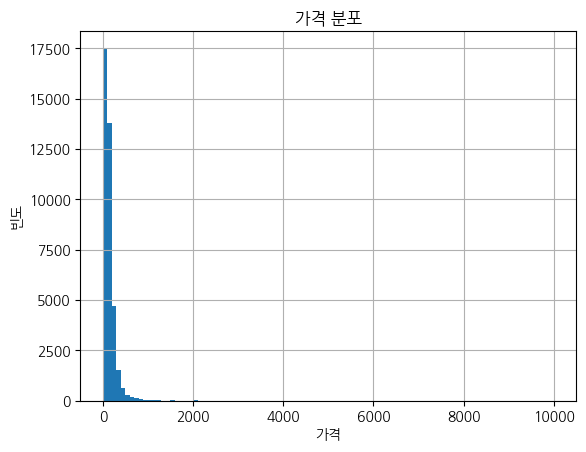

In [21]:
df['price'].hist(bins=100)
plt.xlabel('가격')
plt.ylabel('빈도')
plt.title('가격 분포')
plt.show()

- 가격 분포가 0~1500 구간에 몰려있어 이 구간을 확대하여 그려보겠습니다.
    - bins 설정을 변경 : 히스토그램을 그릴 때 데이터를 나누는 구간(bin)의 개수로, 막대의 개수를 의미합니다.

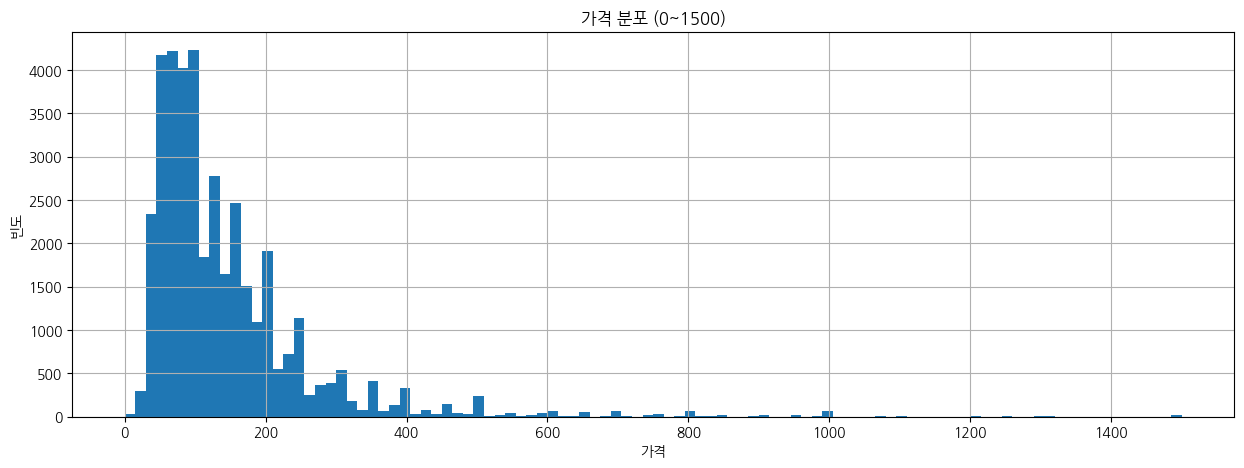

In [23]:
# 가격 분포 : 0~1500범위

plt.figure(figsize=(15, 5))
df['price'].hist(bins=100, range=(0, 1500))
plt.xlabel('가격')
plt.ylabel('빈도')
plt.title('가격 분포 (0~1500)')
plt.show()

- 실제로 가격이 50~150 구간에 몰려있는 것을 확인할 수 있습니다.


## 가격 이상치 처리
- 가격이 0원인 것은 프로모션일 것으로 예상됩니다. 따라서 값을 지불한 경우만 분석에 포함시키기 위해 0원인 경우를 Drop하겠습니다. 

In [25]:
price_0 = df[df['price'] == 0].index
print(price_0)

df_0 = df.drop(price_0)

Index([860, 1060, 2310, 4063, 15135, 27286, 30629, 31883, 32992], dtype='int64')


In [27]:
# 가격이 0인 행이 완전히 삭제됨

df_0[df_0['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


# 3. 컬럼 간의 상관관계로 보는 분석 포인트
A. price에 가장 큰 영향을 미치는 요소는 무엇일까? : 월 평균 리뷰 수(인기도), 지역, 객실 유형 등을 중심으로 -> df_0 사용  
B. 인기 상품(숙소)의 특징은 무엇일까? : (목적 : 최대한 많은 유입/활성화/매출 전환을 얻기 위해) 월 평균 리뷰 수, 연간 가용일 수, 지역, 객실 유형, 가격 등을 중심으로 -> df사용  
C. 월 별 인기 상품의 특징은 무엇일까? : (목적 : 월간 전략 및 상품 기획 ) -> df 사용

---

## A. price에 가장 큰 영향을 미치는 요소는 무엇일까? 
### 상관관계 확인하기 : Heatmap

In [29]:
# 상관관계를 확인할 컬럼들 정의
col = [
    'host_id','latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365'
]
col

['host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### 상관계수 구하기
- 상관관계의 정도를 파악하기 위해 상관 계수를 구한다.
- 피어슨 상관계수(r)는 일발적으로 아래와 같이 해석한다.
    - r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    - r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    - r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    - r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    - r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    - r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    - r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
  
- [위키백과 상관분석 링크 참조](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

In [31]:
# 상관계수 구하기
df_corr = df_0[col].corr()
df_corr

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020033,0.129285,0.013395,-0.016582,-0.142061,0.209672,0.152545,0.201713
latitude,0.020033,1.000000,0.082845,0.034200,0.026410,-0.010895,-0.013898,0.020801,-0.006381
longitude,0.129285,0.082845,1.000000,-0.149087,-0.061822,0.059128,0.135628,-0.114194,0.087361
price,0.013395,0.034200,-0.149087,1.000000,0.037332,-0.047759,-0.050515,0.056292,0.084011
minimum_nights,-0.016582,0.026410,-0.061822,0.037332,1.000000,-0.078432,-0.123131,0.130445,0.141947
number_of_reviews,-0.142061,-0.010895,0.059128,-0.047759,-0.078432,1.000000,0.587066,-0.072244,0.172554
reviews_per_month,0.209672,-0.013898,0.135628,-0.050515,-0.123131,0.587066,1.000000,-0.047516,0.162770
calculated_host_listings_count,0.152545,0.020801,-0.114194,0.056292,0.130445,-0.072244,-0.047516,1.000000,0.225055
availability_365,0.201713,-0.006381,0.087361,0.084011,0.141947,0.172554,0.162770,0.225055,1.000000


### 상관관계 시각화 하기 : Heatmap

<Axes: >

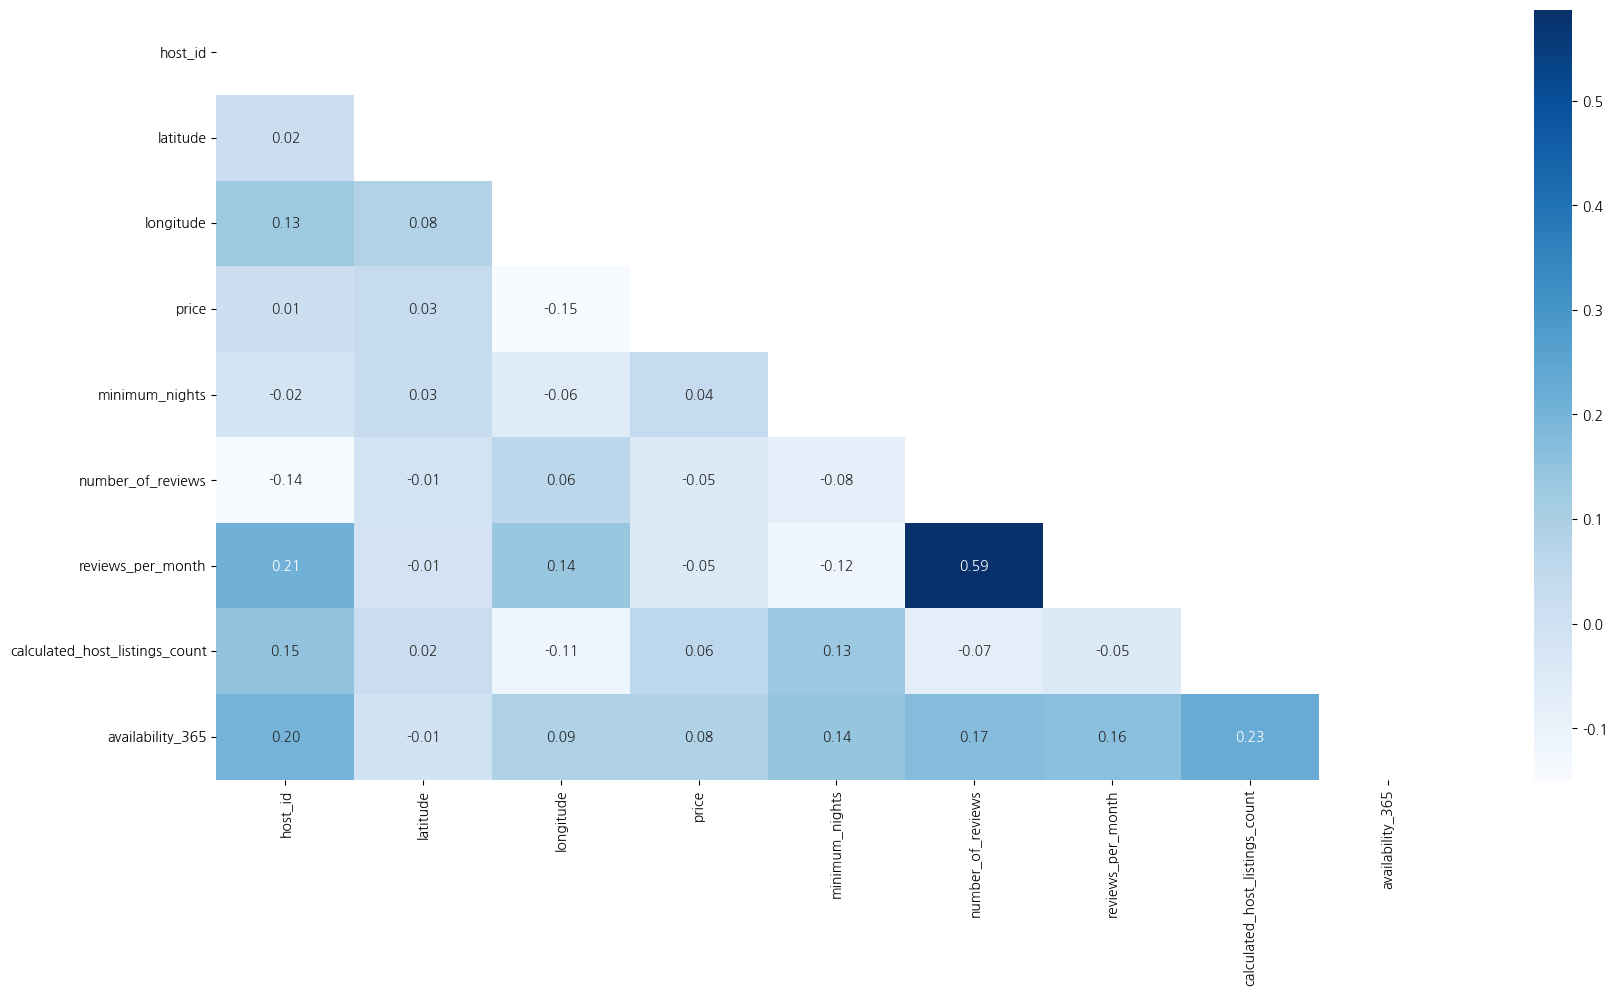

In [33]:
# 상관관계 확인 : 전체 컬럼
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

**< 수치형 데이터 컬럼들 간의 상관관계 >**
- '가격'과 다른 컬럼들의 상관계수가 -0.1과 +0.1 사이의 값으로 선형관계가 보이지 않습니다. 
- '월 평균 리뷰 수'와 '총 리뷰 수' 외에는 특별한 상관관계가 보이지 않습니다.
- 추가적인 상관관계 분석을 위해 2가지 방법을 살펴보겠습니다.
    1. 산점도 행렬 (Scatter plot matrix) : 모든 변수 간의 산점도를 한 번에 시각화하여 비선형 관계나 특이값 등을 파악
    2. 로그 변환 후 정규화 : 데이터 분포를 조정하여 상관관계가 더 잘 드러나도록 하기. 가격(price)과 같이 skewed된 분포를 갖는 변수의 경우 로그 변환을 고려  
 --> '가격'에 영향을 미치는 요인(컬럼)을 파악하기 위해서는 선형관계를 발견하는 것이 적절하므로 로그 변환을 진행하겠습니다.

### 'price' 컬럼 로그 변환 후 정규화하기

In [67]:
# 데이터 복사본 만들기 : 가격이 0인 경우를 제외
df_log = df_0.copy()
df_log.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,0,0.00,1,0


In [69]:
# price 컬럼 로그 변환
df_log['price'] = np.log(df_log['price'])

In [73]:
# 수치형 변수 선택 : price 컬럼 포함
num_cols = df_log.select_dtypes(include=np.number).columns

In [79]:
# 로그 변환된 price 컬럼 정규화 : StandartScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in num_cols:
    df_log[col] = scaler.fit_transform(df_log[[col]])

df_log.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.365714,Room in South Harlem near Central Park,0.335916,Gilles,Manhattan,Harlem,1.336124,-0.122486,Private room,-0.687188,-0.196457,-0.454608,2019-01-01,-0.625895,-0.155869,-0.857987
1,-0.866425,"Large 1BR Apartment, near Times Sq (2nd Floor)",-0.237606,Iradj,Manhattan,Hell's Kitchen,0.578315,-0.820357,Entire home/apt,1.079315,-0.245690,0.913413,2019-06-30,0.367411,-0.155869,1.131728
2,0.717383,West Village Apartment,-0.853899,Petter,Manhattan,West Village,0.021242,-1.153867,Entire home/apt,0.405479,2.609817,-0.499461,2019-02-07,-0.557175,-0.186483,-0.857987
3,-1.663267,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",-0.814093,Eric,Brooklyn,Bedford-Stuyvesant,-0.689410,0.336576,Entire home/apt,-0.408829,-0.147224,4.838064,2019-06-26,1.123323,-0.155869,-0.850393
4,-0.291095,"Sun-drenched apartment, 20 mins to Manhattan",-0.701203,George,Brooklyn,Bedford-Stuyvesant,-0.731429,-0.073733,Private room,-1.352854,1.034365,-0.521888,0,-0.682119,-0.186483,-0.857987


In [81]:
# 상관계수 계산
df_log_corr = df_log[num_cols].corr()

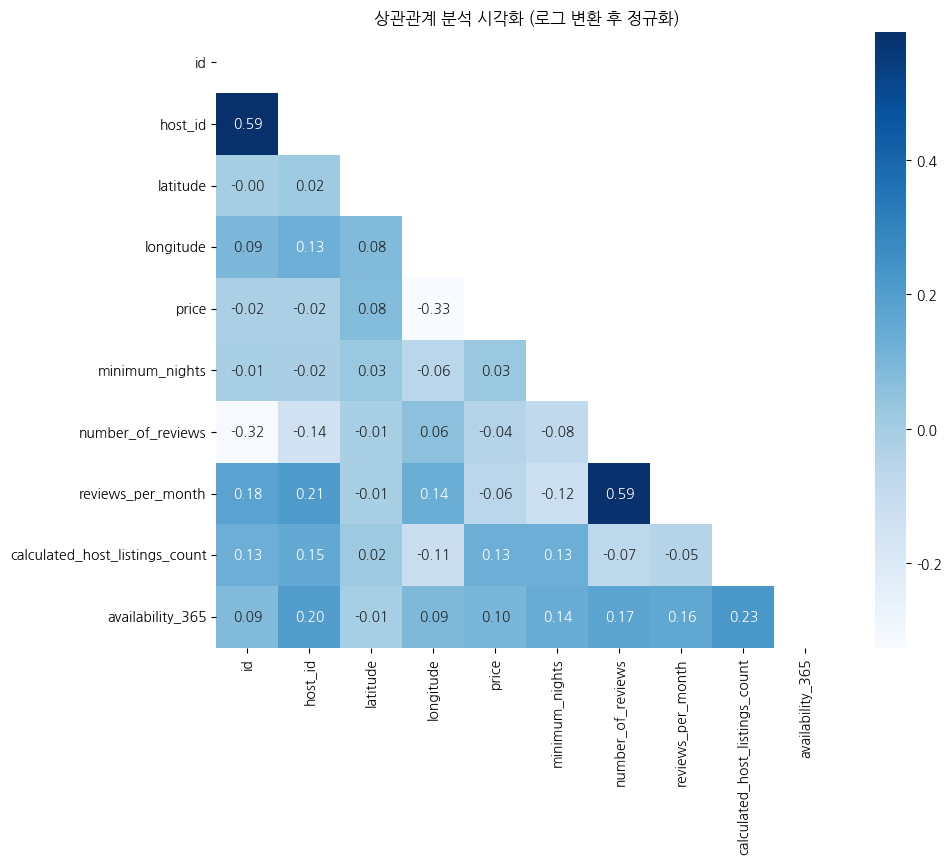

In [89]:
# Heatmap
mask = np.triu(np.ones_like(df_log_corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(df_log_corr, annot=True, cmap='Blues', fmt=".2f", mask=mask)
plt.title("상관관계 분석 시각화 (로그 변환 후 정규화)")
plt.show()

- price와 calculated_host_listings_count(호스트가 등록한 숙소 개수)와의 관계성이 가장 높게 확인되지만, 상관계수가 0.13으로 유의미하다고 보기 어려운 수치입니다.
- 예를 들어 동일한 숙소 개수를 운영한다고 하더라도
    - A 호스트의 숙소는 해당 지역에서의 공급 대비 수요가 적어서 가격이 저렴할 수도 있고,
    - B 호스트의 숙소는 가격을 높게 책정하는 프리미엄 전략을 택할 수도 있기 때문에   
    호스트가 등록한 숙소 개수가 가격에 가장 큰 영향을 주는 요인이라고 보기는 어렵습니다.
- 따라서 도메인적인 지식을 활용해 리뷰 수(인기도), 지역, 객실 유형 등을 중심으로 분석해보겠습니다.

## 리뷰 수와 가격의 상관관계 분석 
- 리뷰가 많다는 것은 그만큼 결제 건수와 인기가 많다는 것을 의미합니다. 뿐만 아니라 많은 사람들이 구매 결정 시 리뷰를 참고하므로 마케팅적으로 굉장히 중요한 요소입니다. 
- number_of_reviews(총 리뷰 수)와 reviews_per_month(월 평균 리뷰 수), price(가격)의 상관관계를 비교해보겠습니다.

### 이상치 제외하고 가격 분포 집중된 곳에서의 산포도 그려볼지? 박스플롯이나 바이올린 플롯 등 다른 분석 방법 찾아볼지?
### scatterplot
- 데이터 샘플을 추출하여 scatterplot을 그려봅니다.

In [104]:
# 데이터 샘플 추출하기
df_sample = df_0.sample(1000, random_state=1)
df_sample.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32743,8241378,West Village: the best part of town,43461780,Andrew,Manhattan,West Village,40.73618,-74.00201,Private room,109,1,0,0,0.00,1,0
31301,24034969,Harlem Charm in a Convenient Location.,40218949,Tom,Manhattan,East Harlem,40.79931,-73.94726,Private room,60,1,35,2019-06-24,2.34,1,94
35986,12154621,Beautiful Room in Crown Heights,3604124,William,Brooklyn,Crown Heights,40.67564,-73.95449,Private room,45,4,4,2017-12-17,0.18,1,0
38225,15529123,"Park slope, floor through garden apartment",8940513,Martha,Brooklyn,Park Slope,40.67148,-73.97479,Entire home/apt,198,7,43,2019-06-12,1.36,1,241
18719,8290210,Overlooking NYC skyline in Greenpoint,41152325,I-Nu,Brooklyn,Greenpoint,40.72373,-73.94537,Entire home/apt,120,5,0,0,0.00,1,0


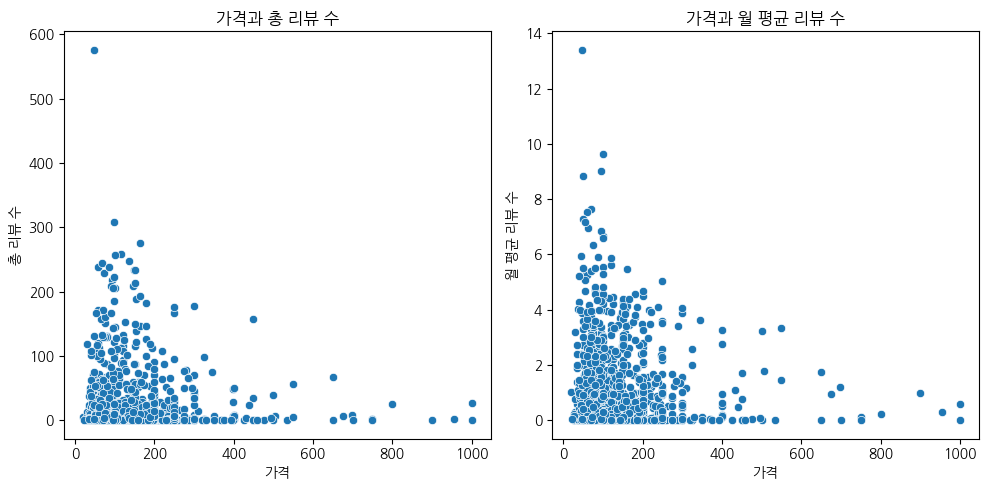

In [126]:
# 서브 플롯
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 첫 번째 그래프 : 가격과 총 리뷰 수
sns.scatterplot(data=df_sample, x="price", y="number_of_reviews", ax=axes[0])
axes[0].set_title('가격과 총 리뷰 수')
axes[0].set_xlabel('가격')
axes[0].set_ylabel('총 리뷰 수')

# 두 번째 그래프 : 가격과 월 평균 리뷰 수
sns.scatterplot(data=df_sample, x="price", y="reviews_per_month", ax=axes[1])
axes[1].set_title('가격과 월 평균 리뷰 수')
axes[1].set_xlabel('가격')
axes[1].set_ylabel('월 평균 리뷰 수')

# 그래프 간 간격 조절
plt.tight_layout()

plt.show()

- 전체 가격 범위에서는 상관관계를 확인하기 어려우므로, 가격 범위를 0~400달러로 설정하여 확인해보겠습니다.

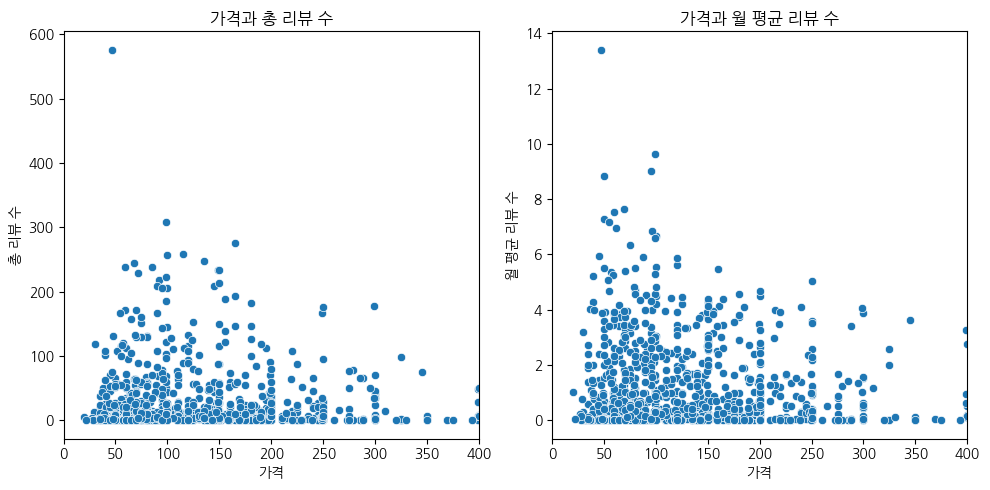

In [133]:
# 서브 플롯
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# price range 설정 : 0 ~ 400
lower_bound = 0
upper_bound = 400

# 첫 번째 그래프 : 가격과 총 리뷰 수
sns.scatterplot(data=df_sample, x="price", y="number_of_reviews", ax=axes[0])
axes[0].set_xlim(lower_bound, upper_bound)
axes[0].set_title('가격과 총 리뷰 수')
axes[0].set_xlabel('가격')
axes[0].set_ylabel('총 리뷰 수')

# 두 번째 그래프 : 가격과 월 평균 리뷰 수
sns.scatterplot(data=df_sample, x="price", y="reviews_per_month", ax=axes[1])
axes[1].set_xlim(lower_bound, upper_bound)
axes[1].set_title('가격과 월 평균 리뷰 수')
axes[1].set_xlabel('가격')
axes[1].set_ylabel('월 평균 리뷰 수')

# 그래프 간 간격 조절
plt.tight_layout()

plt.show()

- '총 리뷰 수', '월 평균 리뷰 수'와 '가격'을 단순히 비교했을 때는 선형관계를 확인하기 어렵습니다.
- 그러나 여행하기 용이한 지역에 있는 숙소의 리뷰가 많을 확률이 높으므로, 지역 분석 시 함께 살펴보도록 하겠습니다.

## 지역
- 인기 관광지와 가까운지, 부동산 가격에 따라 가격 영향 미칠 것으로 예상
- neighbourhood_group: 뉴욕시의 주요 지역, neighbourhood: 뉴욕시의 이웃 지역

In [151]:
# 지역 종류 확인하기

print('- neighbourhood_group 종류 개수:', df_0['neighbourhood_group'].nunique())
print(df_0['neighbourhood_group'].unique())

print('')

print('- neighbourhood 종류 개수:', df_0['neighbourhood'].nunique())
print(df_0['neighbourhood'].unique())

- neighbourhood_group 종류 개수: 5
['Manhattan' 'Brooklyn' 'Bronx' 'Queens' 'Staten Island']

- neighbourhood 종류 개수: 221
['Harlem' "Hell's Kitchen" 'West Village' 'Bedford-Stuyvesant' 'Midtown'
 'East Village' 'Mott Haven' 'East Elmhurst' 'Park Slope' 'Sheepshead Bay'
 'Upper East Side' 'Bay Ridge' 'Washington Heights' 'Jackson Heights'
 'Inwood' 'Windsor Terrace' 'Kips Bay' 'Williamsburg' 'Greenwich Village'
 'Bushwick' 'East Harlem' 'Chelsea' 'Crown Heights' 'Flatiron District'
 'West Brighton' 'Murray Hill' 'East Flatbush' 'Greenpoint'
 'Upper West Side' 'Jamaica' 'SoHo' 'Brooklyn Heights' 'Fort Greene'
 'Borough Park' 'Nolita' 'Gramercy' 'Carroll Gardens' 'Clinton Hill'
 'Queens Village' 'Gowanus' 'NoHo' 'Roosevelt Island' 'Astoria'
 'Lower East Side' 'Prospect Heights' 'Dyker Heights' 'Battery Park City'
 'Throgs Neck' 'Flatbush' 'Edgemere' 'Allerton'
 'Prospect-Lefferts Gardens' 'Sunnyside' 'Gravesend' 'Sunset Park'
 'Kensington' 'Boerum Hill' 'Theater District' 'South Ozone Park'
 '

# 할 일
- 남은 분석 완료 (유의미한 거겠지..?)
- 태블로 분석할만한, 가공한 데이터 csv로 뽑기

# 리뷰 수 많은 것 중 -> 최신 리뷰의 비중이 높은 것?

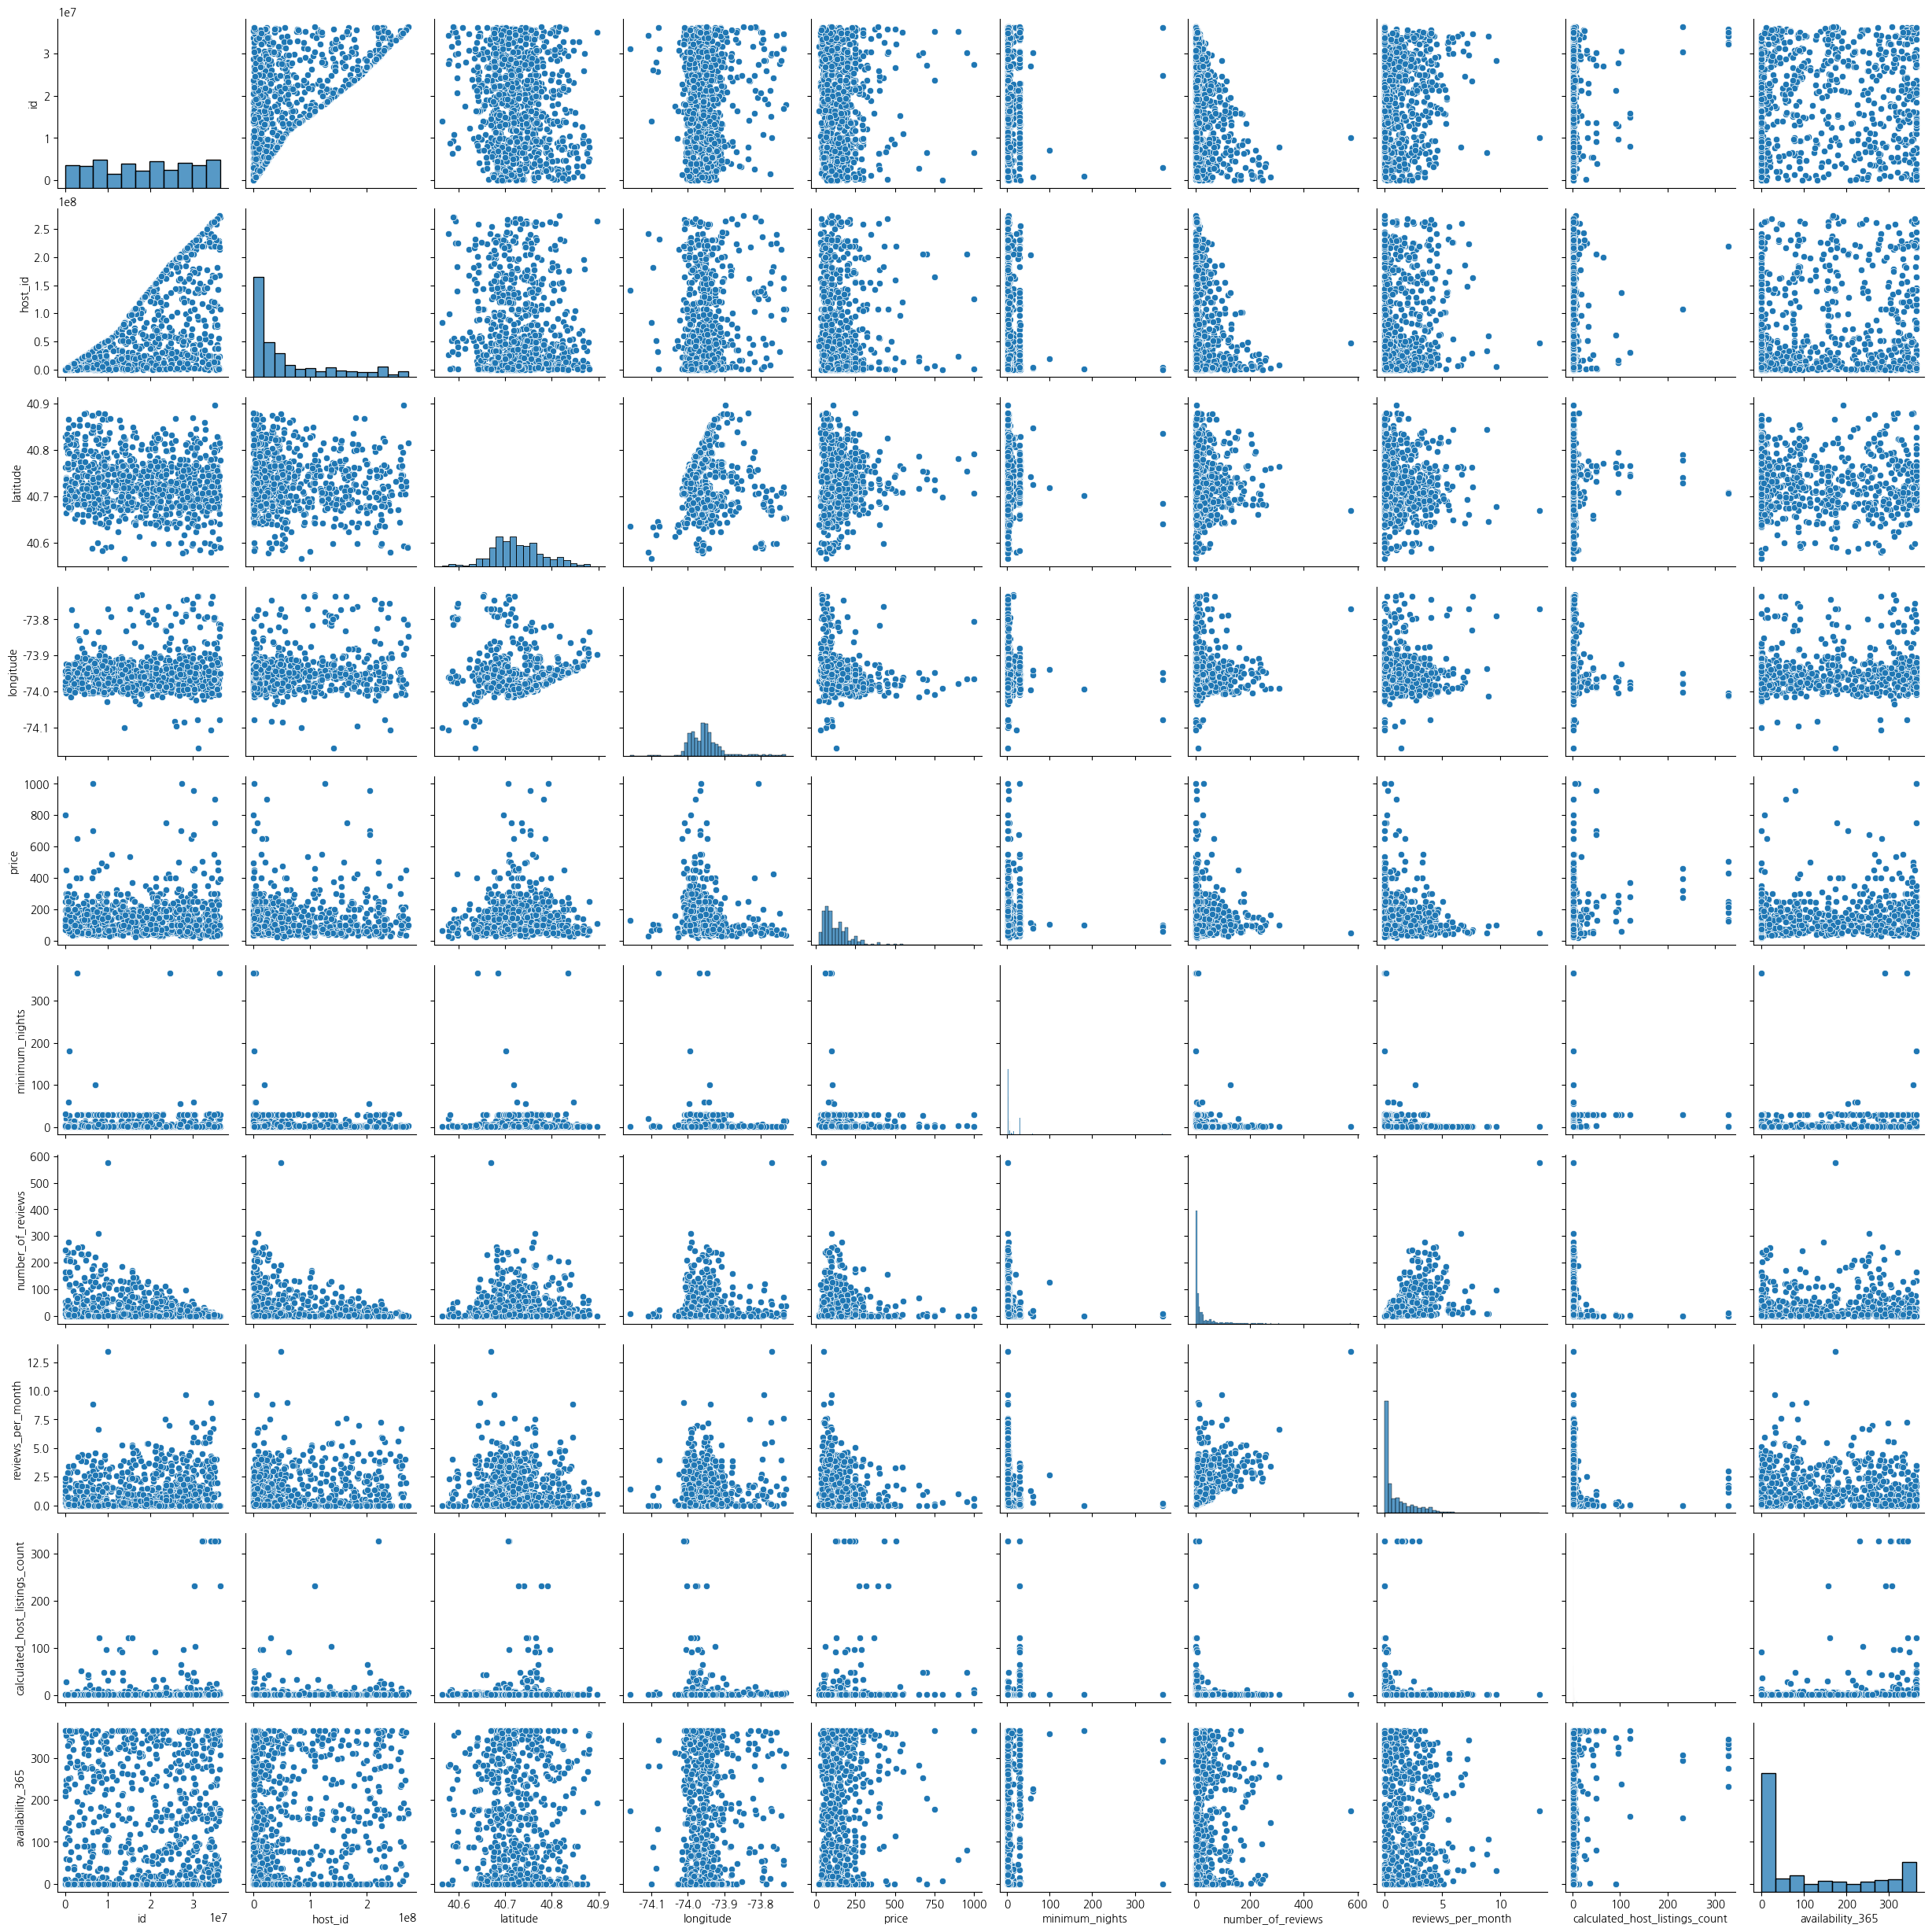

In [45]:
# 산점도 행렬 그리기
sns.pairplot(df_sample)

### 상관관계 : 산점도 행렬
- 데이터 샘플을 추출하여 scatterplot을 그려봅니다.
- '가격'과의 상관계수가 그 중에서도 컸던 'calculated_host_listings_count'와 'availability_365'로 그려보겠습니다.
(호스트가 등록한 숙소 개수, 연간 가용 일수)

<Axes: xlabel='price', ylabel='availability_365'>

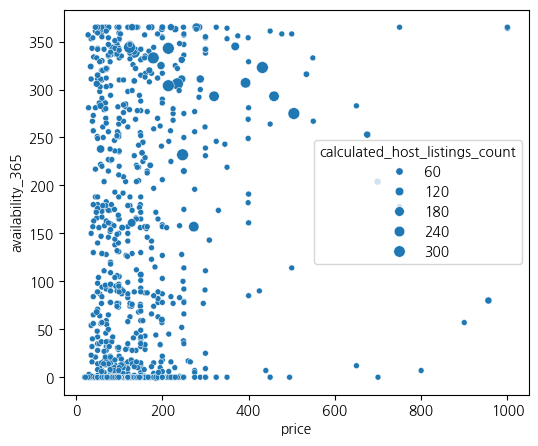

In [43]:
# 상관관계 시각화 : 가격, 연간 가용 일수, 호스트가 등록한 숙소 개수
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_sample, x="price", y="availability_365", size="calculated_host_listings_count")

In [ ]:
가격이 낮은 범위에 몰려있을 뿐, 선형관계는 보이지 않습니다. 

### 정규화
1. MinMaxScaler()
- 장점 : 직관적이고 이해하기 쉽습니다. 데이터 값을 0과 1사이로 조정합니다.
- 특징 : 이상치에 민감하며, 정규 분포를 가정하지 않습니다. 
    - 데이터의 최소값과 최대값을 기준으로 데이터를 조정하므로 이상치가 존재할 경우 데이터 전체가 왜곡될 수 있습니다.
- 결론 : Airbnb의 가격 데이터에는 극단적으로 높은 값이 존재하므로 적절하지 않습니다.

2. StandardScaler()
- 설명 : 데이터의 평균을 0, 표준편차를 1로 변환하여 데이터를 표준 정규 분포로 만듭니다. 각 데이터 포인트는 평균으로부터 얼마나 떨어져 있는지 표준편차의 배수로 표현됩니다.
- 장점 : MinMaxScaler()에 비해 이상치에 상대적으로 덜 민감합니다.
- 특징 : 데이터가 정규 분포를 따른다고 가정하며, 이상치가 매우 클 경우 여전히 영향을 받을 수 있습니다.
- 결론 : 극단적인 이상치가 존재하므로 적절하지 않습니다.

3. RobustScaler()
- 설명 : 중앙값(median)과 사분위수 범위(IQR)를 사용하여 데이터를 변환합니다. IQR은 1사분위수(25%)와 3사분위수(75%) 사이의 범위로, 이상치의 영향을 덜 받습니다.
- 장점 : 이상치에 매우 강하며, 데이터 분포에 대한 가정이 필요 없습니다.
- 특징 : 다른 스케일러에 비해 변환된 데이터의 범위가 좁을 수 있습니다.
- 결론 : 왼쪽에 몰려있는 분포로, 높은 가격들은 포함되지 않으므로 적절하지 않습니다.

4. 로그 변환 후 정규화  
**로그 변환이란?**  
- 목적 : 데이터의 분포를 조정하여 분석하기 용이하게 만듭니다. 특히 데이터가 양의 값만 가지고 있고, 오른쪽으로 꼬리가 긴 경우에 유용합니다. (right-skewed)
- 방법 : 데이터 값에 로그 함수 함수(log)를 적용합니다.
- 장점 :
  - 데이터의 왜도*를 줄여 정규 분포에 가깝게 만들어줍니다. 
    - 이상치의 영향을 줄여줍니다.
    - 데이터의 스케일을 줄여 계산을 용이하게 합니다.
- 특징 :
  - 데이터에 0 또는 음수 값이 포함되어 있으면 로그 변환이 불가능합니다. 이 경우 모든 값에 작은 양수를 더하여 해결할 수 있습니다.
  - 로그 변환된 데이터는 원래의 의미를 잃어버리므로 해석에 주의해야 합니다.
  
**< 결론 >**  
가격 데이터 분포가 오른쪽으로 꼬리가 긴 형태이므로 로그 변환 후 정규화가 가장 적합합니다.
    

*왜도 : 데이터 분포의 비대칭 정도를 나타내는 통계량으로, 데이터가 평균을 중심으로 얼마나 한쪽으로 치우쳐져 있는지를 나타냅니다.  
**스케일 : 데이터 값의 범위를 의미합니다. 즉, 데이터가 가질 수 있는 최솟값과 최댓값 사이의 간격을 나타냅니다.

In [ ]:
모든 컬럼을 정규화해야 할까요?
반드시 모든 컬럼을 정규화해야 하는 것은 아닙니다. 정규화 필요성은 데이터와 분석 목적에 따라 달라집니다.

일반적으로 정규화가 필요한 경우
1. 특성 스케일 차이가 큰 경우
가격, 리뷰 수, 가용 일수 등 특성 값의 범위가 크게 차이 나는 경우, 모델 학습 시 특정 특성이 과도하게 반영될 수 있습니다.
이 경우, 특성 스케일링(정규화 또는 표준화)을 통해 특성 값의 범위를 유사하게 맞춰주는 것이 좋습니다.

전체 컬럼들을 다같이 로그변환 후 정규화 해야하는 것 아닌지??? -> 특성 값의 범위가 크게 차이 나는 경우만 해도 무관 (나머지가 아니라면)

특성 값 범위 차이
1. 여러 컬럼 간 스케일 차이
가격(10,000원 ~ 100,000원), 리뷰 수(0개 ~ 100개), 가용 일수(0일 ~ 365일)처럼 여러 컬럼 값이 범위가 크게 차이 나는 경우를 의미합니다.
2. 한 컬럼 내 데이터 분포
한 컬럼(예: 가격) 안에서도 최솟값과 최댓값 차이가 매우 큰 경우를 의미할 수 있습니다.
하지만 이 경우, 특성 스케일링보다는 이상치 제거 또는 변환(로그 변환 등)을 고려하는 것이 더 적절할 수 있습니다.
특성 스케일링 필요성
1. 여러 컬럼 간 스케일 차이
모델 학습 시 특정 컬럼이 과도하게 반영되는 것을 방지하기 위해 필요합니다.
2. 한 컬럼 내 데이터 분포
반드시 필요한 것은 아니지만, 이상치 제거 후 스케일링을 적용하면 모델 성능 향상에 도움이 될 수 있습니다.


In [ ]:
# 1. 로그 변환할 컬럼 선택 (가격 컬럼만 선택)
col_to_log = 'price'

# 2. 로그 변환 수행 
df_0[price_log] = np.log(df_0[col_to_log])

# 3. 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()

# 로그 변환된 컬럼만 선택하여 정규화
df[[col_to_log]] = scaler.fit_transform(df_0[[price_log]])

# 5. 결과 확인
print(df.head())

# (선택) 정규화된 데이터를 다시 원래 스케일로 되돌리려면
# scaler.inverse_transform()을 사용하면 됩니다.
# 주의: 로그 변환된 데이터는 원래의 의미를 잃어버리므로,
# 해석에 주의해야 합니다.


from sklearn.preprocessing import MinMaxScaler

# 1. price 컬럼 로그 변환
df['price_log'] = np.log1p(df['price'])

# 2. 로그 변환된 price 컬럼 정규화
scaler = MinMaxScaler()
df['price_log_scaled'] = scaler.fit_transform(df[['price_log']])

# 3. (선택) 원래 price 컬럼, 로그 변환된 price 컬럼, 정규화된 price 컬럼 비교
print(df[['price', 'price_log', 'price_log_scaled']].head())

# 할 일
1. 로그 변환 -> 정규화 하고
2. 상관관계 다시 파악 -> 인사이트 도출
3. 범주형 데이터 & 수치형 데이터 상관관계 파악
  
또는 다음 주제로 넘어가기!

In [ ]:
# 데이터 샘플 추출하기 : random_state 설정하여 - 이상치 파악에 용이
df_sample = df.sample(1000, random_state=1)
df_sample